### Sprint 5 - MLFP
### Team 8 : Aditya Deshmukh, Michelle Menachery, Hossein Khoshhal 
#### Topic : Pennsylvania Restaraunt Recommender

### 1. Data Processing & Cleaning

#### The following datasets business.json, user.json, and review.json from the Yelp Dataset are being used. The goal is to narrow down relevant rows and columns to our project for pennsylvania recommendations and clear away any unneccessary information or null values. Also, the processing will involve converting the JSON files into csv's for EDA and modeling.


In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn import metrics
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
import numpy as np
from imblearn.over_sampling import RandomOverSampler
import re

In [2]:
review_df = pd.read_csv('review_pa.csv')
review_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
2,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31
3,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16
4,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0,0,0,0,Good food--loved the gnocchi with marinara\nth...,2009-10-14 19:57:14
...,...,...,...,...,...,...,...,...,...
1061385,X5R98ygOtbhryDiKA-J2qQ,LHWtjTG7e1NzNPYUbUo-9w,rgeuy1qbw6Z8B6CSVANHIA,5.0,1,1,1,I've been to the other Federal Donuts location...,2012-10-13 14:39:37
1061386,MVg4YUQeEhCA7Z7RsBJSVg,7-7A0Avj47slLGV7yBFc8w,ytynqOUb3hjKeJfRj5Tshw,3.0,1,0,0,"I was so excited about all the food I saw, but...",2013-07-25 21:00:15
1061387,nLjbVsETpqO17RbFcqskkA,am7-gkH_PDz598oTdYSD6A,3gVSrS4kffGGZT8oXHsIcw,3.0,2,0,2,"*Later Yelp* I've only been here once, but I l...",2014-11-03 14:45:46
1061388,cACxcUY_AIsQKkpDRXuqnw,MCzlzlOw7IGbRAKVjJBPtg,fcGexL5VH5G2Xw0tRj9uOQ,3.0,1,1,0,This is a good pizza option - they deliver thr...,2018-03-13 13:54:48


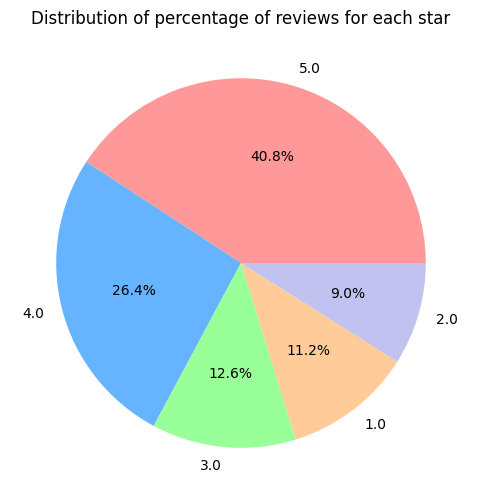

In [4]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
plt.figure(figsize=(10, 6))
review_df['stars'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors)
plt.ylabel('')  
plt.title('Distribution of percentage of reviews for each star')
plt.show()

In [5]:
# Tp divide the reviews based on the star rating into three different sentiments - neutral, positive, negative
conditions = [
    review_df['stars'] == 3,
    review_df['stars'] < 3,
    review_df['stars'] > 3
]
sentiments = ['neutral', 'negative', 'positive']
review_df['sentiment'] = np.select(conditions, sentiments, default='neutral')

In [6]:
all_reviews= review_df[['stars', 'sentiment','text']]

In [7]:
all_reviews.head(5)

,stars,sentiment,text
0,3.0,neutral,"If you decide to eat here, just be aware it is..."
1,5.0,positive,"Wow! Yummy, different, delicious. Our favo..."
2,1.0,negative,I am a long term frequent customer of this est...
3,5.0,positive,Amazingly amazing wings and homemade bleu chee...
4,4.0,positive,Good food--loved the gnocchi with marinara\nth...


In [9]:
positive_reviews = all_reviews[all_reviews['sentiment'] == 'positive']
sample_positive_reviews = positive_reviews.sample(n=10000, random_state=42)

negative_reviews = all_reviews[all_reviews['sentiment'] == 'negative']
sample_negative_reviews = negative_reviews.sample(n=10000, random_state=42)

nuetral_reviews = all_reviews[all_reviews['sentiment'] == 'neutral']
sample_nuetral_reviews = nuetral_reviews.sample(n=10000, random_state=42)

sampled_df = pd.concat([sample_positive_reviews, sample_negative_reviews, sample_nuetral_reviews], ignore_index=True)

In [10]:
sampled_df.head()

,stars,sentiment,text
0,4.0,positive,My husband and I happened upon this place afte...
1,5.0,positive,Drink are nice. Their live show was great. V...
2,4.0,positive,Food - 4+\nService - 4\nPrices - 5\nQuality of...
3,5.0,positive,This place is awesome. I definitely recommend ...
4,5.0,positive,EAT cafe is no longer a regular cafe for the p...


In [11]:
sampled_df['sentiment'].value_counts()

positive    10000
negative    10000
neutral     10000
Name: sentiment, dtype: int64

In [14]:
sampled_df['text'] = sampled_df['text'].apply(lambda x: x.lower())
sampled_df['text'] = sampled_df['text'].apply(lambda x: re.sub(r'[\n\r]', ' ', x))
sampled_df['text'] = sampled_df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
sampled_df['text'] = sampled_df['text'].apply(lambda x: re.sub(r'\d+', '', x))

In [15]:
sampled_df.head()

,stars,sentiment,text
0,4.0,positive,my husband and i happened upon this place afte...
1,5.0,positive,drink are nice their live show was great veg...
2,4.0,positive,food service prices quality of ingredien...
3,5.0,positive,this place is awesome i definitely recommend s...
4,5.0,positive,eat cafe is no longer a regular cafe for the p...


In [16]:
#We are pre-processing the text using tokenization and lemmatization
sampled_df['text'] = sampled_df['text'].replace('[^a-zA-Z]', ' ', regex=True)
sampled_df['tokenedtext'] = sampled_df['text'].apply(lambda x: word_tokenize(x))
lemmatizer = WordNetLemmatizer()
sampled_df['tokenedtext'] = sampled_df['tokenedtext'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

In [17]:
sampled_df.head()

,stars,sentiment,text,tokenedtext
0,4.0,positive,my husband and i happened upon this place afte...,"[my, husband, and, i, happened, upon, this, pl..."
1,5.0,positive,drink are nice their live show was great veg...,"[drink, are, nice, their, live, show, wa, grea..."
2,4.0,positive,food service prices quality of ingredien...,"[food, service, price, quality, of, ingredient..."
3,5.0,positive,this place is awesome i definitely recommend s...,"[this, place, is, awesome, i, definitely, reco..."
4,5.0,positive,eat cafe is no longer a regular cafe for the p...,"[eat, cafe, is, no, longer, a, regular, cafe, ..."


In [18]:
sampled_df['stemmedtext'] = sampled_df['tokenedtext'].apply(lambda x: [lemmatizer.lemmatize(j) for j in x if not j in set(STOP_WORDS)] )

In [19]:
sampled_df['finalcleanedtext'] = sampled_df['stemmedtext'].apply(lambda x: ' '.join(x) ) 

In [20]:
sampled_df.head(5)

,stars,sentiment,text,tokenedtext,stemmedtext,finalcleanedtext
0,4.0,positive,my husband and i happened upon this place afte...,"[my, husband, and, i, happened, upon, this, pl...","[husband, happened, place, dropping, daughter,...",husband happened place dropping daughter nearb...
1,5.0,positive,drink are nice their live show was great veg...,"[drink, are, nice, their, live, show, wa, grea...","[drink, nice, live, wa, great, vegan, cheese, ...",drink nice live wa great vegan cheese steak wa...
2,4.0,positive,food service prices quality of ingredien...,"[food, service, price, quality, of, ingredient...","[food, service, price, quality, ingredient, ch...",food service price quality ingredient chinnar ...
3,5.0,positive,this place is awesome i definitely recommend s...,"[this, place, is, awesome, i, definitely, reco...","[place, awesome, definitely, recommend, starti...",place awesome definitely recommend starting me...
4,5.0,positive,eat cafe is no longer a regular cafe for the p...,"[eat, cafe, is, no, longer, a, regular, cafe, ...","[eat, cafe, longer, regular, cafe, public, ha,...",eat cafe longer regular cafe public ha transfo...


In [21]:
cleaned_df = sampled_df[['sentiment','finalcleanedtext']]
cleaned_df.head(5)

,sentiment,finalcleanedtext
0,positive,husband happened place dropping daughter nearb...
1,positive,drink nice live wa great vegan cheese steak wa...
2,positive,food service price quality ingredient chinnar ...
3,positive,place awesome definitely recommend starting me...
4,positive,eat cafe longer regular cafe public ha transfo...


In [22]:
label_encoder = LabelEncoder()
cleaned_df['sentiment'] = label_encoder.fit_transform(cleaned_df['sentiment'])

C:\Users\adity\AppData\Local\Temp\ipykernel_15720\3041189974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['sentiment'] = label_encoder.fit_transform(cleaned_df['sentiment'])


In [23]:
cleaned_df.head(5)

,sentiment,finalcleanedtext
0,2,husband happened place dropping daughter nearb...
1,2,drink nice live wa great vegan cheese steak wa...
2,2,food service price quality ingredient chinnar ...
3,2,place awesome definitely recommend starting me...
4,2,eat cafe longer regular cafe public ha transfo...


In [24]:
# Splitting the dataset into training and test and also performing label encoding
x=cleaned_df.finalcleanedtext 
y=cleaned_df.sentiment 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [25]:
x_train_array = x_train.values
x_train_reshaped = x_train_array.reshape(-1, 1)
ros = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train_reshaped, y_train)

In [26]:
X_train_resampled = [str(x) for x in x_train_resampled]
vect = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 2))
x_train_transformed = vect.fit_transform(X_train_resampled)
x_test_transformed = vect.transform(x_test)

In [27]:
# Converting the dtm generated into a dataframe for better interpretation
vectorized_df=pd.DataFrame(x_train_transformed.toarray(),columns=vect.get_feature_names_out())
vectorized_df.head()

,able,able dessert,able enjoy,able finish,able forget,able grab,able star,absolute,absolute jalape,absolute worse,...,yummy chicken,yummy great,yummy seasoned,yummy son,zawzeech,zawzeech star,zip,zip dining,zippy,zippy quick
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Defining the models that we want to use to predict the sentiment based on review text 
gradient_boosting_classifier = GradientBoostingClassifier()
rnadom_forest_classifier = RandomForestClassifier()
k_neighbors_classifier = KNeighborsClassifier()
logistic_regression = LogisticRegression(solver='saga', max_iter=1000)
xgboost_classifier = xgb.XGBClassifier()

models = [gradient_boosting_classifier, rnadom_forest_classifier, k_neighbors_classifier, logistic_regression, xgboost_classifier]

In [29]:
# Creating the function to compare 5 different models
def models_accuracy(models, vect, x_train, y_train, x_test, y_test):
    models_array = []
    for model in models:
        model.fit(x_train, y_train)
        y_pred_class = model.predict(x_test)
        data = {'accuracy_score': metrics.accuracy_score(y_test, y_pred_class)}
        models_array.append(data)

    model_dataframe = pd.DataFrame(models_array, index=[
        'Gradient Boosting Classifier',
        'Random Forest Classifier',
        'K-Neighbors Classifier',
        'Logistic Regression',
        'XGBoost Classifier'
    ])
    return model_dataframe

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def hyperparameter_tuning(models, param_grids, x_train, y_train):
    best_models = []
    for model, param_grid in zip(models, param_grids):
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
        grid_search.fit(x_train, y_train)
        best_model = grid_search.best_estimator_
        best_models.append(best_model)
    return best_models

# Define parameter grids for each model
param_grids = [
    { # Gradient Boosting Classifier
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 10]
    },
    { # Random Forest Classifier
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    { # K-Neighbors Classifier
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    { # Logistic Regression
        'C': [0.01, 0.1, 1.0, 10.0],
        'penalty': ['l1', 'l2']
    },
    { # XGBoost Classifier
        'max_depth': [3, 5, 10],
        'learning_rate': [0.01, 0.1, 0.5],
        'n_estimators': [50, 100, 200]
    }
]

# Perform hyperparameter tuning for all models
best_models = hyperparameter_tuning(models, param_grids, vectorized_df, y_train_resampled)

# Evaluate best models on test set
results = []
for model in best_models:
    y_pred = model.predict(x_test_transformed)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    results.append({'Model': model.__class__.__name__, 'Accuracy': accuracy})

# Print results
for result in results:
    print(result)

In [ ]:
# Printing out the accuracy results for 5 different models to predict sentiment and identify the best model
final_results = models_accuracy(models, vect, x_train_transformed, y_train_resampled, x_test_transformed, y_test)
print(final_results)

                              accuracy_score
Gradient Boosting Classifier        0.684274
Random Forest Classifier            0.710284
K-Neighbors Classifier              0.355342
Logistic Regression                 0.737895
XGBoost Classifier                  0.729092


Logistic Regression performs the best out of all the model with an accuracy of 0.73 which means that it is able to best predict the sentiment based on the review text provided by the users. 